# Orvin Tritama

## Research question/interests

With the conclusion in our team's discussion, my team and I will be analyzing dataset in the video gaming industry. With the everchanging nature of technology, video game industries have been changing in terms of the services and subscriptions that they use to develop and offer to the users using the updated tools and technologies in the field. With the rapid growth in the industry, I am interested in analyzing the shift in trend of platforms used in the video gaming industry, ranging from the retro-gaming to modernized-gaming consoles overtime from 1995 to 2020.  

Please do take note that this research is mainly on the shift of trends in gaming platforms that games are built for, **not** the popularity of gaming platform overtime. 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

## Loading Data

Here my analysis data is loaded from the path as passed in read_csv. Here you can see the first 5 and the 5 elements of the (partially) cleaned data.
*Note: Data is (partially) cleaned, all the columns that are unused by all team members have been removed, however as I progressed in my analysis, I will be cleaning the rest of the data to get a dataframe that is only useful for my analysis purposes*

In [ ]:
df = pd.read_csv (r'../data/processed/games-data-processed.csv')

## Exploratory Data Analysis
Here I will explore some general observations and trends in the dataframe.

### Data examples shape and size of the dataframe
Below you will be able to see a couple rows from the dataset and how the shape and size of the dataframe is at the moment (shape and size means rows,columns)

In [ ]:
print(f'There are (rows,columns) in the dataset) {df.shape}')
print('Here are the first 5 rows in the dataset:\n')
df.head(n=5)

There are (rows,columns) in the dataset) (17944, 6)
Here are the first 5 rows in the dataset:



,name,platform,r-date,developer,genre,players
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,Nintendo,"Action Adventure,Fantasy",1 Player
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,NeversoftEntertainment,"Sports,Alternative,Skateboarding",02-Jan
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player
3,SoulCalibur,Dreamcast,08-Sep-99,Namco,"Action,Fighting,3D",02-Jan
4,Grand Theft Auto IV,Xbox360,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player


### Deeper observations into the data 
Since my analysis will focus mainly on platform and r-date, here are some deeper understanding of my dataframe, in the focus area

In [ ]:
print('Here are the number of distinct values in each column that are available in the dataframe: ')
print(df.nunique())

print('As you can see there are namely 11762 different game names, 22 different platforms, etc..\n')

Here are the number of distinct values in each column that are available in the dataframe: 
name         11762
platform        22
r-date        4357
developer     4253
genre         2042
players         55
dtype: int64
As you can see there are namely 11762 different game names, 22 different platforms, etc..



In [ ]:
print('Here are the platforms that are used in the gaming industry from 1995 to 2020 based on the dataset')
platformArray = pd.unique(df['platform'])
for index in range(len(platformArray)):
    print(f'{index+1} {platformArray[index]}')

Here are the platforms that are used in the gaming industry from 1995 to 2020 based on the dataset
1 Nintendo64
2 PlayStation
3 PlayStation3
4 Dreamcast
5 Xbox360
6 Wii
7 XboxOne
8 Switch
9 PlayStation2
10 PlayStation4
11 GameCube
12 Xbox
13 PC
14 WiiU
15 GameBoyAdvance
16 3DS
17 DS
18 PlayStationVita
19 PSP
20 XboxSeriesX
21 PlayStation5
22 Stadia


## Cleaning Data
In this part, I will remove most of the columns that are not used in my data analysis.  
To answer my research question focusing on the trend of gaming platform overtime, we will focus only on two columns from the dataset, which are **platform** and **r-date**. However, I will keep the 'name' column in my analysis for the purposes of readibility and comprehension of our dataset for the user. 

In [ ]:
df = df.drop(columns=['genre','players', 'developer'])

print('Here is a sample of the first five rows in my cleaned data\n')
print(df.head(n=5))

Here is a sample of the first five rows in my cleaned data

                                   name      platform     r-date
0  The Legend of Zelda: Ocarina of Time    Nintendo64  23-Nov-98
1              Tony Hawk's Pro Skater 2   PlayStation  20-Sep-00
2                   Grand Theft Auto IV  PlayStation3  29-Apr-08
3                           SoulCalibur     Dreamcast  08-Sep-99
4                   Grand Theft Auto IV       Xbox360  29-Apr-08


## Process Data and Data Wrangling
In this part, I will process some of data mainly for the **platform** and **r-date**.  
1. For the r-date, I will convert the months of the date into using numbers, i.e: January=1, February=2, and so on. Also, I will convert the date to follow Canadian Date Format which is {YYYY-MM-DD} from the given {DD-Month-YY'} format. Finally, this date will be converted to a datetime object using `.dt.date` to remove the timezone information and HH:MM:SS. The final result will be stored in a new column name "New_Release_Date" that will be further used for the analysis

2. I will grab the year from the newly added column "New_Release_Dataset". This year column will be added to the very last column called "Release_Year". The reason for this addition is because in my data analysis, I wil  

#### Processing 1.

In [ ]:
newDate = []

for index, row in df.iterrows():
        year = row['r-date'][7:9]
        if ( int(year) > 20 ):
            year = '19' + row['r-date'][7:9]
        else:
            year = '20' + row['r-date'][7:9]
        date = row['r-date'][0:2]
        month_name = row['r-date'][3:6]
        mnum = datetime.datetime.strptime(month_name, '%b').month
        finalDate = datetime.datetime(int(year), mnum, int(date))
        newDate.append(finalDate)

df.insert(loc=len(df.columns),column="New_Release_Date",value=newDate)
df["New_Release_Date"] = df["New_Release_Date"].dt.date
df.head(n=5)

# For repeating and testing purposes
# df = df.drop(columns=["New_Release_Date"])

,name,platform,r-date,New_Release_Date
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,1998-11-23
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,2000-09-20
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,2008-04-29
3,SoulCalibur,Dreamcast,08-Sep-99,1999-09-08
4,Grand Theft Auto IV,Xbox360,29-Apr-08,2008-04-29


#### Processing 2.

In [ ]:
releaseYear = pd.DatetimeIndex(df['New_Release_Date']).year
df.insert(loc=len(df.columns),column="Release_Year",value=releaseYear)
# Convert Release_Year to int
df['Release_Year'] = df['Release_Year'].astype(int)
df.head(n=5)

# only UNCOMMENT drop and comment the rest to redo the repeat doing the question 
# df = df.drop(columns=["Release_Year"])

,name,platform,r-date,New_Release_Date,Release_Year
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,1998-11-23,1998
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,2000-09-20,2000
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,2008-04-29,2008
3,SoulCalibur,Dreamcast,08-Sep-99,1999-09-08,1999
4,Grand Theft Auto IV,Xbox360,29-Apr-08,2008-04-29,2008


#### Extra Exploratory Data Analysis after Data Processing
With this extra step of changing the data. I now am able to see the first and last release date in this dataset.

**Note:** that the first and last release date is not when the game is created or when the platform is first built.
The 'first_platform_release_date' is the first release date used in the dataset of the corresponding game using that platform.

In [ ]:
first_platform_release_date = df['New_Release_Date'].min()
last_platform_release_date = df['New_Release_Date'].max()

print(f'The first release date is: {first_platform_release_date}')
print(f'The last release date is: {last_platform_release_date}')

The first release date is: 1995-04-30
The last release date is: 2020-11-12


## Data Analysis
Here I will start my data analysis that hopefully will help me to answer my research question in giving an overview of how the trend of platform used in gaming have changed overtime from 1995 to 2020.

To start, here's a bar chart showing the count of platform used between 1995-2020.

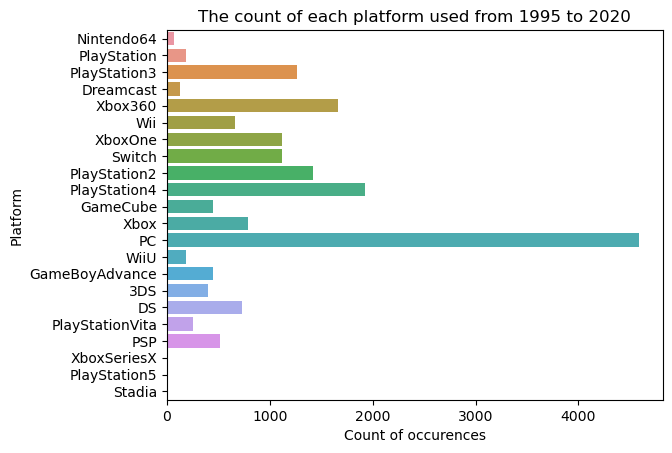

In [ ]:
cp1 = sns.countplot(data=df, y="platform")
cp1 = cp1.set(xlabel="Count of occurences", ylabel="Platform", title="The count of each platform used from 1995 to 2020")

In [ ]:
countOfXboxSeriesX = (df['platform'].values == 'XboxSeriesX').sum()
print(f'Count of occurences of XboxSeriesX platform: {countOfXboxSeriesX}')

countOfPlayStation5 = (df['platform'].values == 'PlayStation5').sum()
print(f'Count of occurences of PlayStation5 platform: {countOfPlayStation5}')

countOfStadia = (df['platform'].values == 'Stadia').sum()
print(f'Count of occurences of Stadia platform: {countOfStadia}')



Count of occurences of XboxSeriesX platform: 2
Count of occurences of PlayStation5 platform: 3
Count of occurences of Stadia platform: 4


### Explanation of this graph
As you can see from the count plot above, From 1995 to 2020, PC is the most popular gaming platform that games are developed for. The second closest one is PS4 that is not even half of the count of PC. You can see that following the x-axis and y-axis, the ranks of the gaming creation for specific gaming platform goes from PC, PlayStation 4, XBOX360 and so-on.  
Interestingly, XboxSeriesX, PlayStation5 and Stadia are shown as no bar in the graph, but the line above tells us that there are a couple of them. The reason this value is not showing is because the range in the x-axis is wide enough, i.e it ranges from 0 to 1000, to 2000 and so on. Since there are only 2,3,4 count respectively, the count plot's range doesn't detect such minute numbers. 

Now, let's take a deeper look at the trend of platform used for different games in the gaming industry.  
Below, I will create a histogram. In each year, I will show the count of different gaming platforms overtime.

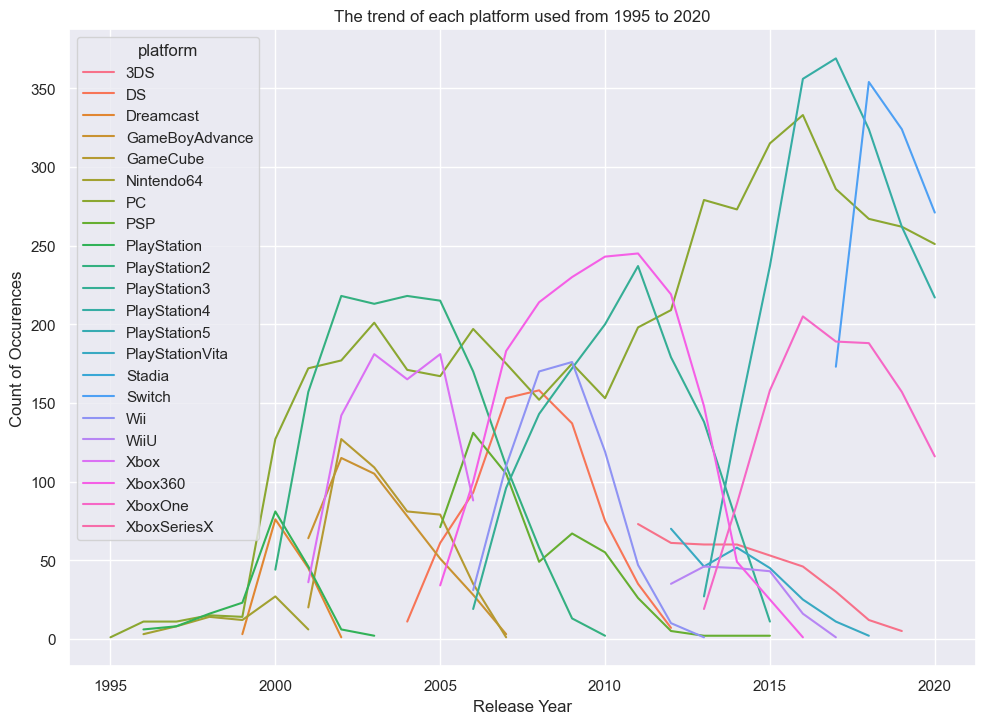

In [ ]:
# Grouping by platform and release_year, and count the platform on each year
dfCount = df.groupby(['platform', 'Release_Year'])['platform'].count()

# Specific settings to lineplot 1) Size of the lineplot, 2) 22 Colors to avoid overlapping of each platform
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.color_palette("rocket", 22)

lp = sns.lineplot(dfCount, x="Release_Year", y=df.groupby(['platform', 'Release_Year'])['platform'].count(), hue="platform")
lp = lp.set(xlabel="Release Year", ylabel="Count of Occurences", title="The trend of each platform used from 1995 to 2020")